## figures for images

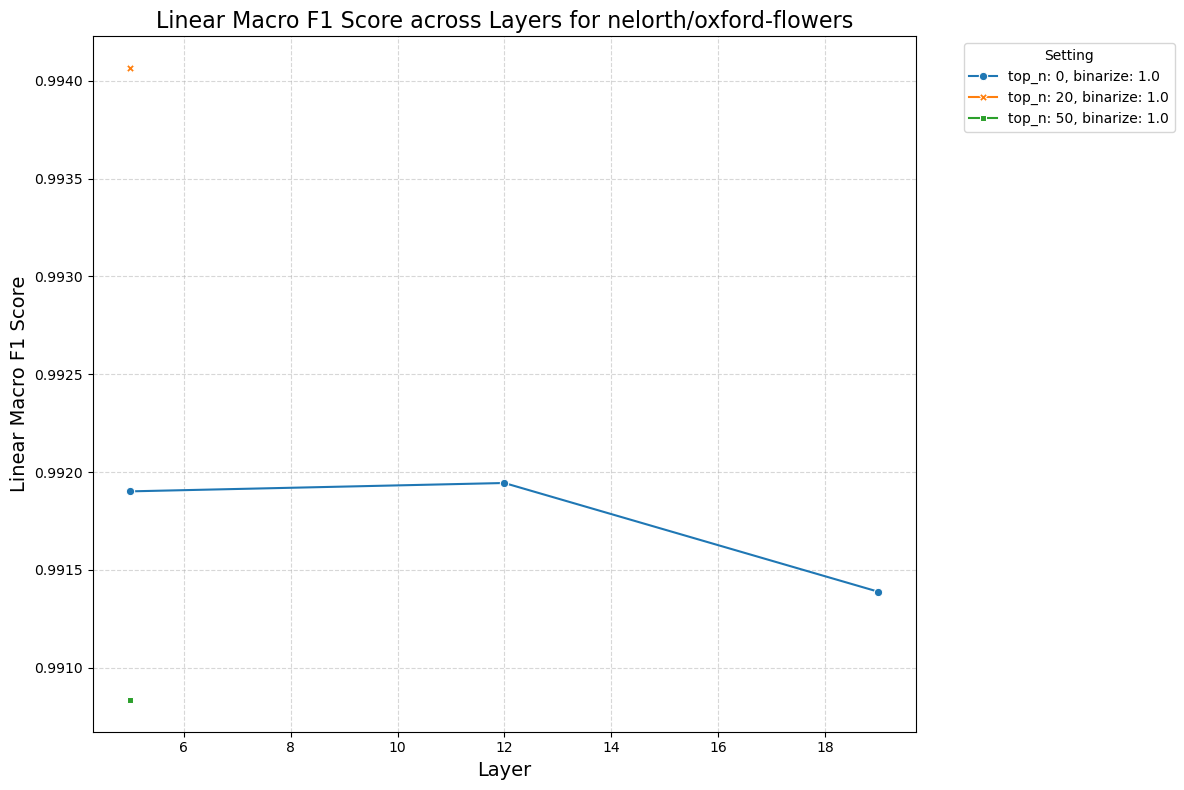

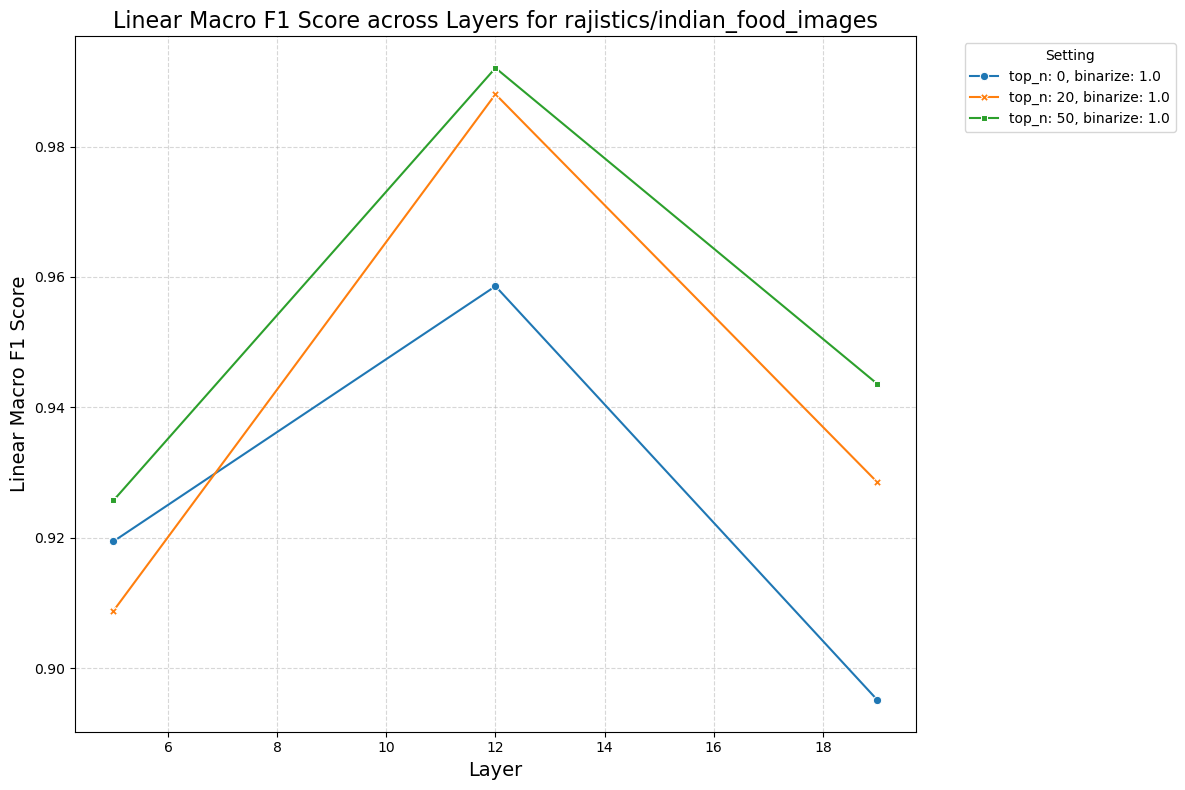

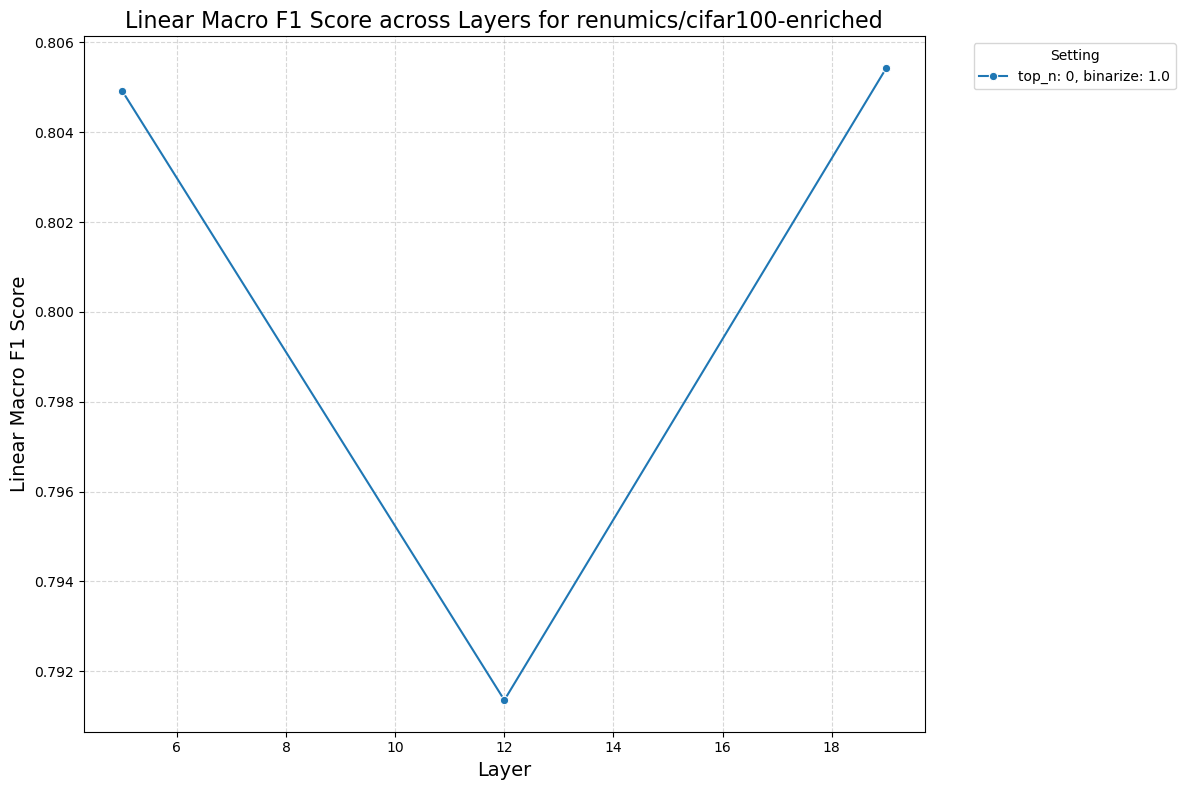

In [21]:
import pandas as pd

df = pd.read_csv('macro_f1_scores.csv')
dataset_of_interest = [ 'nelorth/oxford-flowers',
                        'rajistics/indian_food_images',
                        'renumics/cifar100-enriched'
                        ]
df = df[df['dataset_name'].isin(dataset_of_interest)]
df = df[df['model_name'] == 'google/paligemma2-3b-pt-448']

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter for SAE Features only
sae_df = df[df['type'] == 'SAE Features']

# Group by dataset, layer, top_n, and binarize and compute the mean score
grouped = sae_df.groupby(['dataset_name', 'layer', 'top_n', 'binarize'])['linear_macro_f1_score'].mean().reset_index()

# Create a new column for setting description
grouped['setting'] = grouped.apply(lambda r: f"top_n: {r.top_n}, binarize: {r.binarize}", axis=1)

# Get unique datasets
datasets = grouped['dataset_name'].unique()

# Plot for each dataset
for dataset in datasets:
    dataset_data = grouped[grouped['dataset_name'] == dataset]
    
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=dataset_data,
        x='layer',
        y='linear_macro_f1_score',
        hue='setting',
        style='setting',
        markers=True,
        dashes=False
    )
    plt.title(f'Linear Macro F1 Score across Layers for {dataset}', fontsize=16)
    plt.xlabel('Layer', fontsize=14)
    plt.ylabel('Linear Macro F1 Score', fontsize=14)
    plt.legend(title='Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [6]:
import pandas as pd

df = pd.read_csv('macro_f1_scores.csv')
dataset_of_interest = [ 'nelorth/oxford-flowers',
                        'rajistics/indian_food_images',
                        'renumics/cifar100-enriched'
                        ]
df = df[df['dataset_name'].isin(dataset_of_interest)]
df = df[df['model_name'] == 'google/paligemma2-3b-pt-224']
df = df.fillna('no')

df = df[df['width'] == '16k']
df

,timestamp,model_name,layer,width,top_n,binarize,type,dataset_name,dataset_split,linear_macro_f1_score,linear_accuracy,linear_mean_cv_accuracy,linear_std_cv_accuracy,decision_tree_macro_f1_score,decision_tree_accuracy,decision_tree_mean_cv_accuracy,decision_tree_std_cv_accuracy
410,2024-12-12T10:05:47.710609,google/paligemma2-3b-pt-224,12,16k,0,no,Hidden States,rajistics/indian_food_images,test,0.397547,0.423077,0.456619,0.037034,0.062054,0.083333,0.080181,0.028378
411,2024-12-12T10:05:47.714058,google/paligemma2-3b-pt-224,12,16k,0,no,SAE Features,rajistics/indian_food_images,test,0.865145,0.858974,0.849355,0.028370,0.563422,0.564103,0.549665,0.030296
412,2024-12-12T10:06:43.061249,google/paligemma2-3b-pt-224,12,16k,0,1.0,Hidden States,rajistics/indian_food_images,test,0.402575,0.416667,0.463135,0.021536,0.062054,0.083333,0.080181,0.028378
413,2024-12-12T10:06:43.065994,google/paligemma2-3b-pt-224,12,16k,0,1.0,SAE Features,rajistics/indian_food_images,test,0.913364,0.910256,0.884555,0.031725,0.484077,0.525641,0.548181,0.042756
414,2024-12-12T10:09:10.028361,google/paligemma2-3b-pt-224,12,16k,20,no,Hidden States,rajistics/indian_food_images,test,0.384678,0.403846,0.455123,0.033225,0.087190,0.102564,0.081703,0.021020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,2024-12-13T04:18:48.948463,google/paligemma2-3b-pt-224,19,16k,20,1.0,SAE Features,nelorth/oxford-flowers,train,0.972651,0.979777,0.973845,0.006115,0.098285,0.150628,0.144551,0.005820
770,2024-12-13T04:56:32.819164,google/paligemma2-3b-pt-224,19,16k,50,no,Hidden States,nelorth/oxford-flowers,train,0.803818,0.850070,0.839582,0.007971,0.007232,0.018828,0.017437,0.003531
771,2024-12-13T04:56:32.832153,google/paligemma2-3b-pt-224,19,16k,50,no,SAE Features,nelorth/oxford-flowers,train,0.973575,0.979079,0.975065,0.001305,0.103477,0.142259,0.122058,0.017859
772,2024-12-13T05:22:18.247735,google/paligemma2-3b-pt-224,19,16k,50,1.0,Hidden States,nelorth/oxford-flowers,train,0.810732,0.851464,0.839407,0.009017,0.007232,0.018828,0.017437,0.003531


In [7]:
import pandas as pd

# Filter for SAE Features only
sae_df = df[df['type'] == 'Hidden States']

# Group by dataset, layer, top_n, and binarize, then calculate the mean linear_macro_f1_score
grouped = sae_df.groupby(['dataset_name', 'layer', 'top_n', 'binarize'])['linear_macro_f1_score'].mean().reset_index()

# For each dataset and layer, find the top_n and binarize combination that gives the best average score
best_combinations = grouped.loc[grouped.groupby(['dataset_name', 'layer'])['linear_macro_f1_score'].idxmax()]

print("Best top_n and binarization combinations for each dataset and layer (based on Linear Macro F1 Score):")
print(best_combinations)

Best top_n and binarization combinations for each dataset and layer (based on Linear Macro F1 Score):
                    dataset_name  layer  top_n binarize  linear_macro_f1_score
2         nelorth/oxford-flowers      5     20      1.0               0.780278
10        nelorth/oxford-flowers     12     50      1.0               0.846791
15        nelorth/oxford-flowers     19     20       no               0.825188
18  rajistics/indian_food_images      5      0      1.0               0.333998
28  rajistics/indian_food_images     12     50      1.0               0.568740
32  rajistics/indian_food_images     19     20      1.0               0.443746
38    renumics/cifar100-enriched      5     20      1.0               0.525005
45    renumics/cifar100-enriched     12     20       no               0.596807
48    renumics/cifar100-enriched     19      0      1.0               0.578377


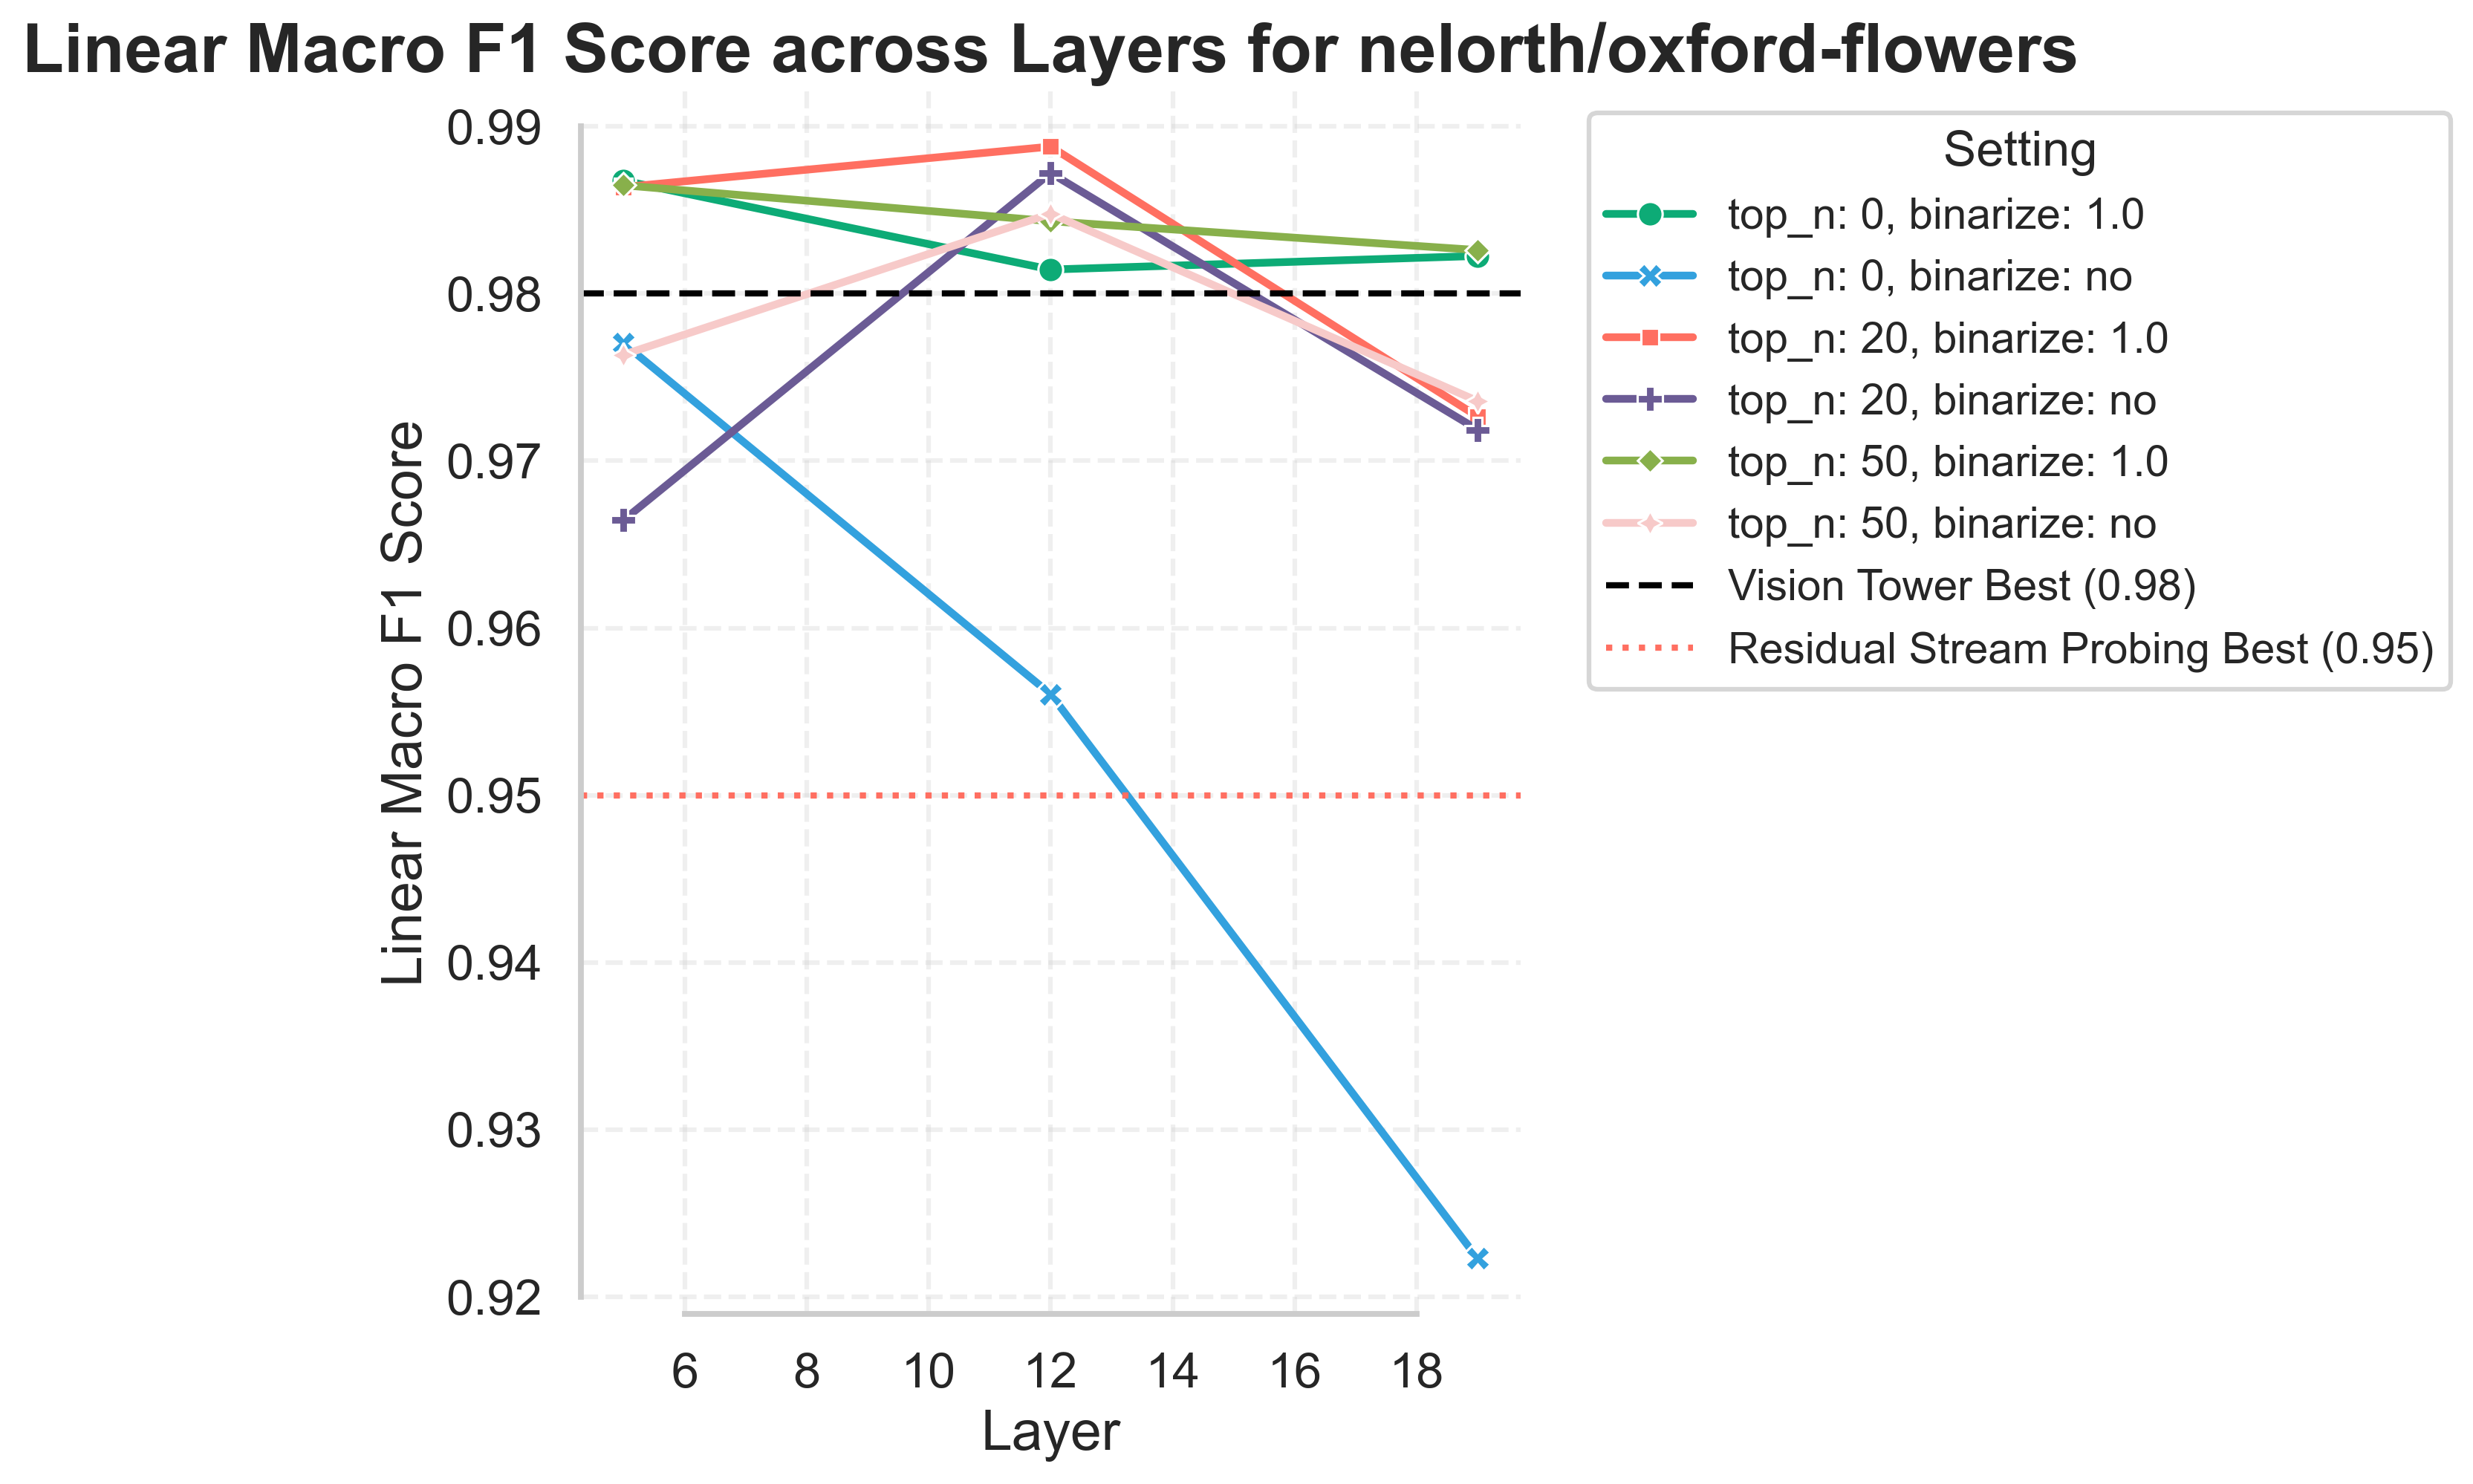

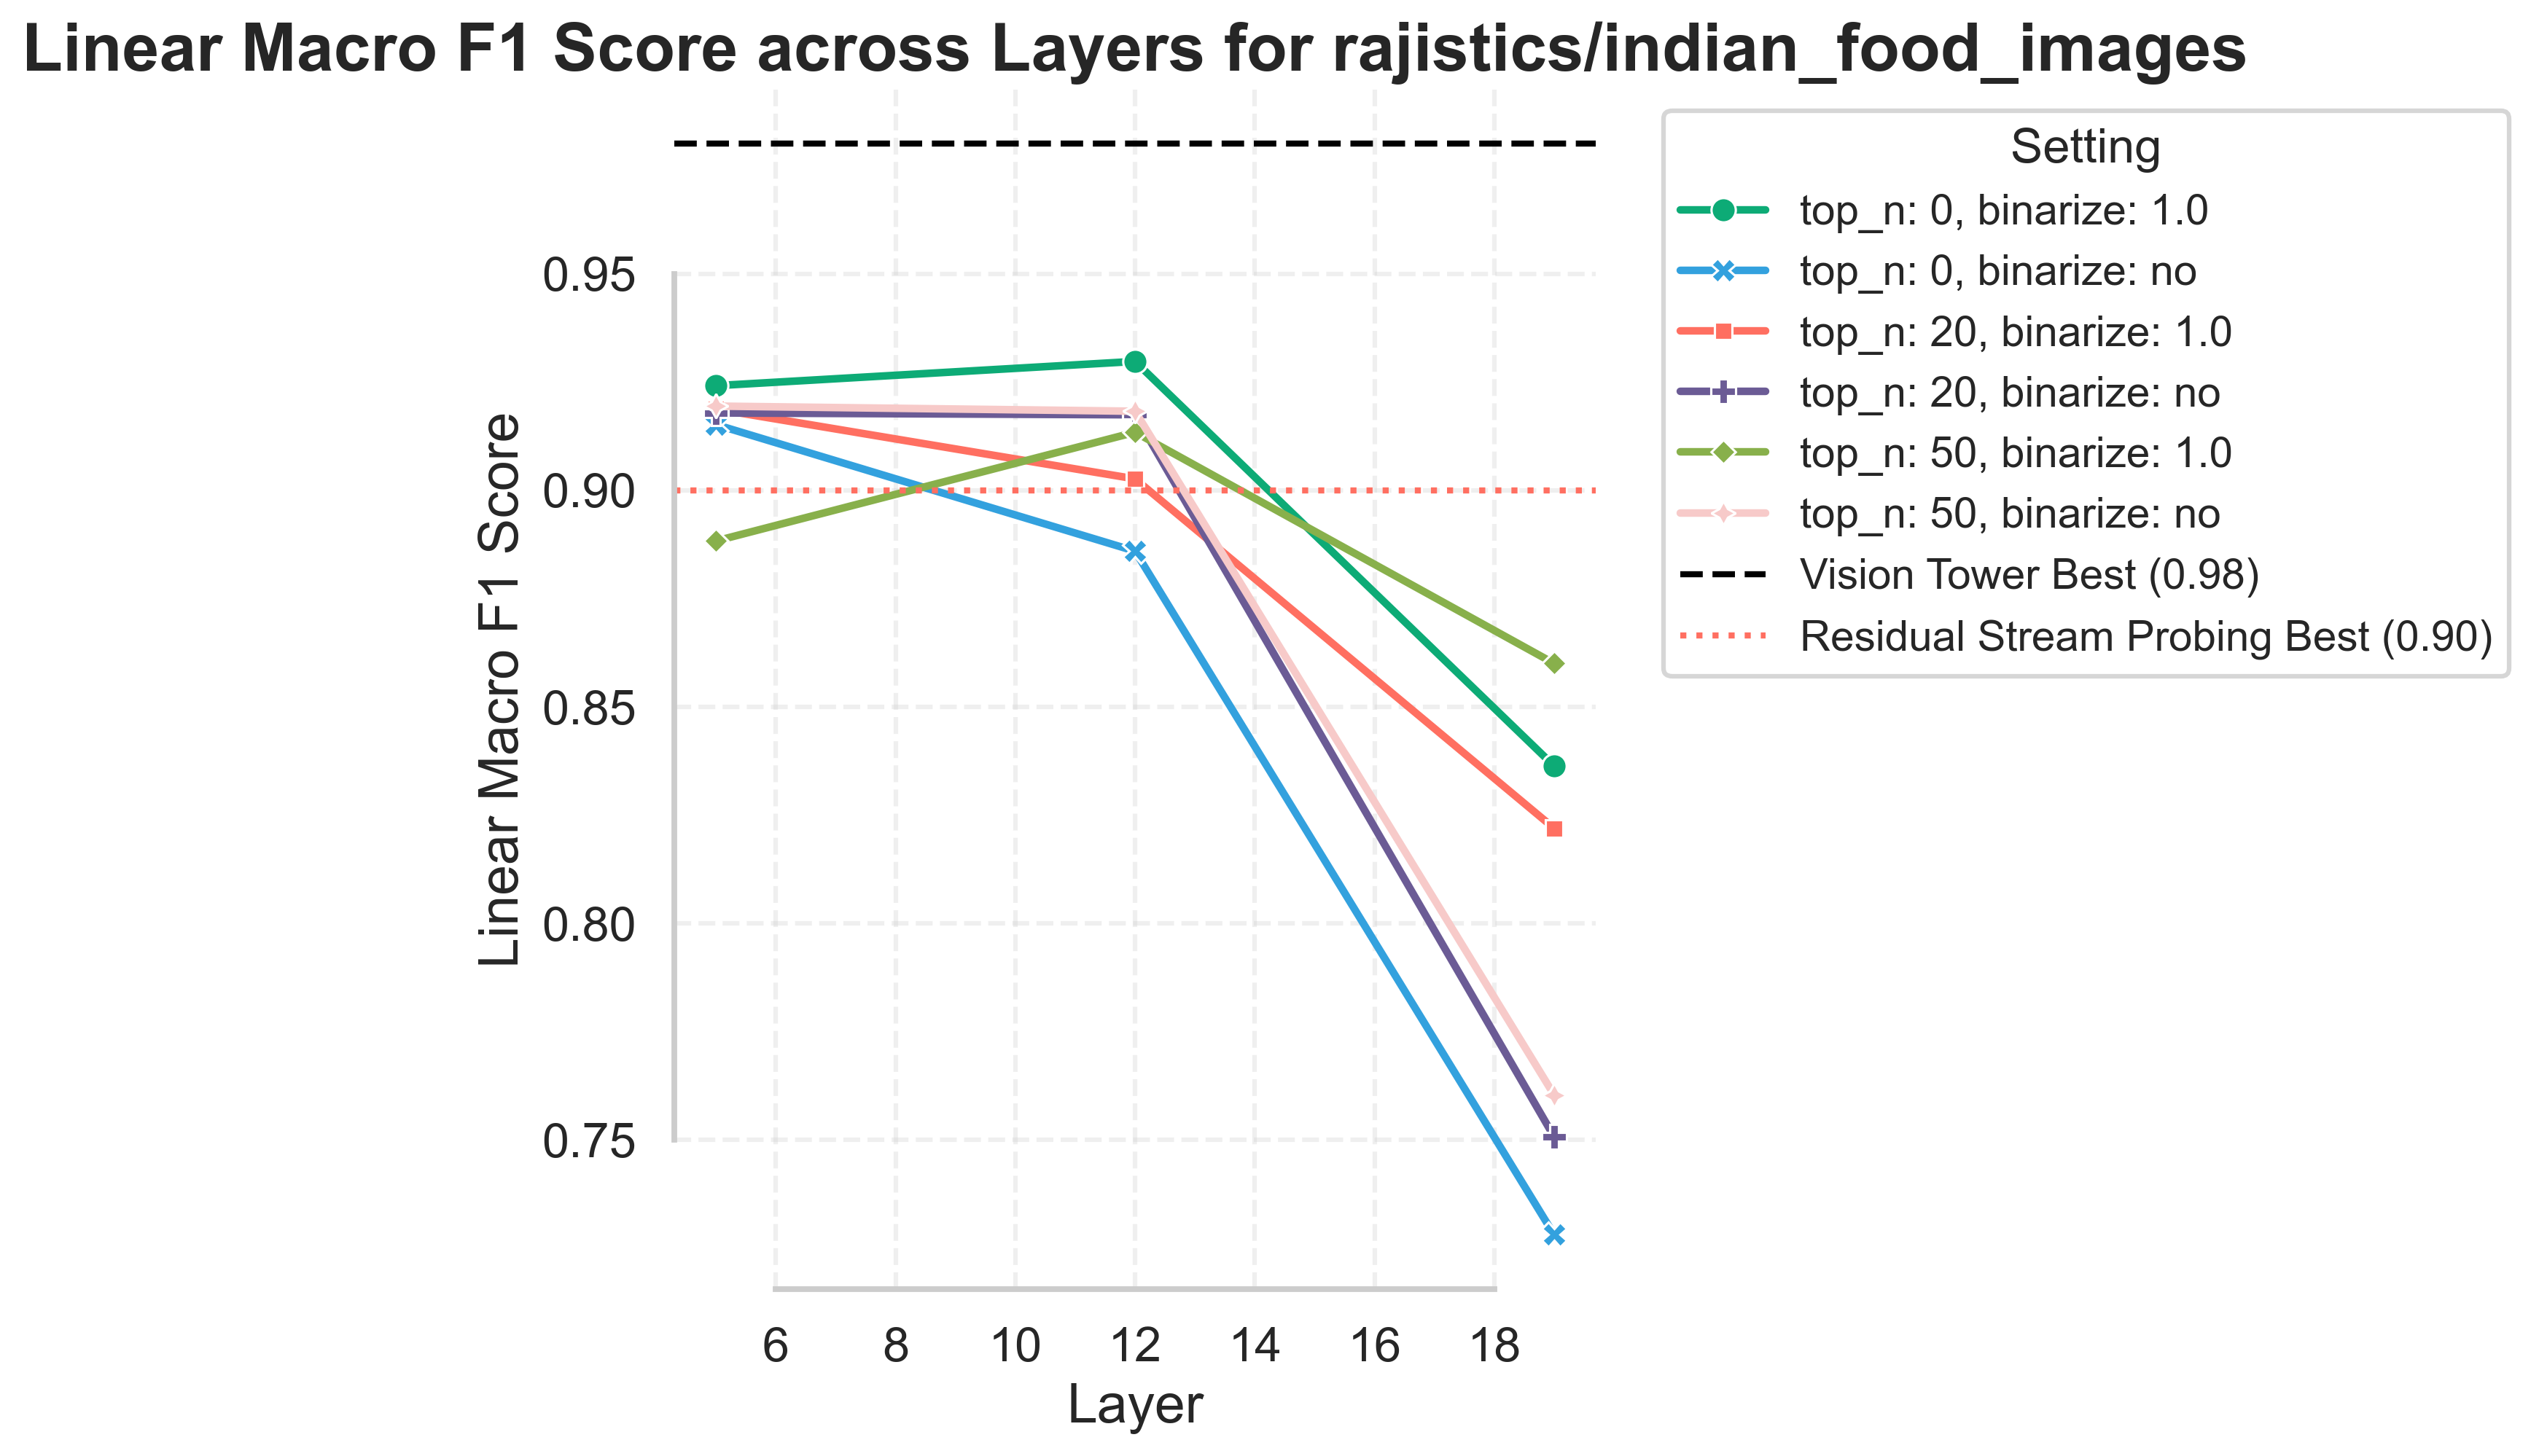

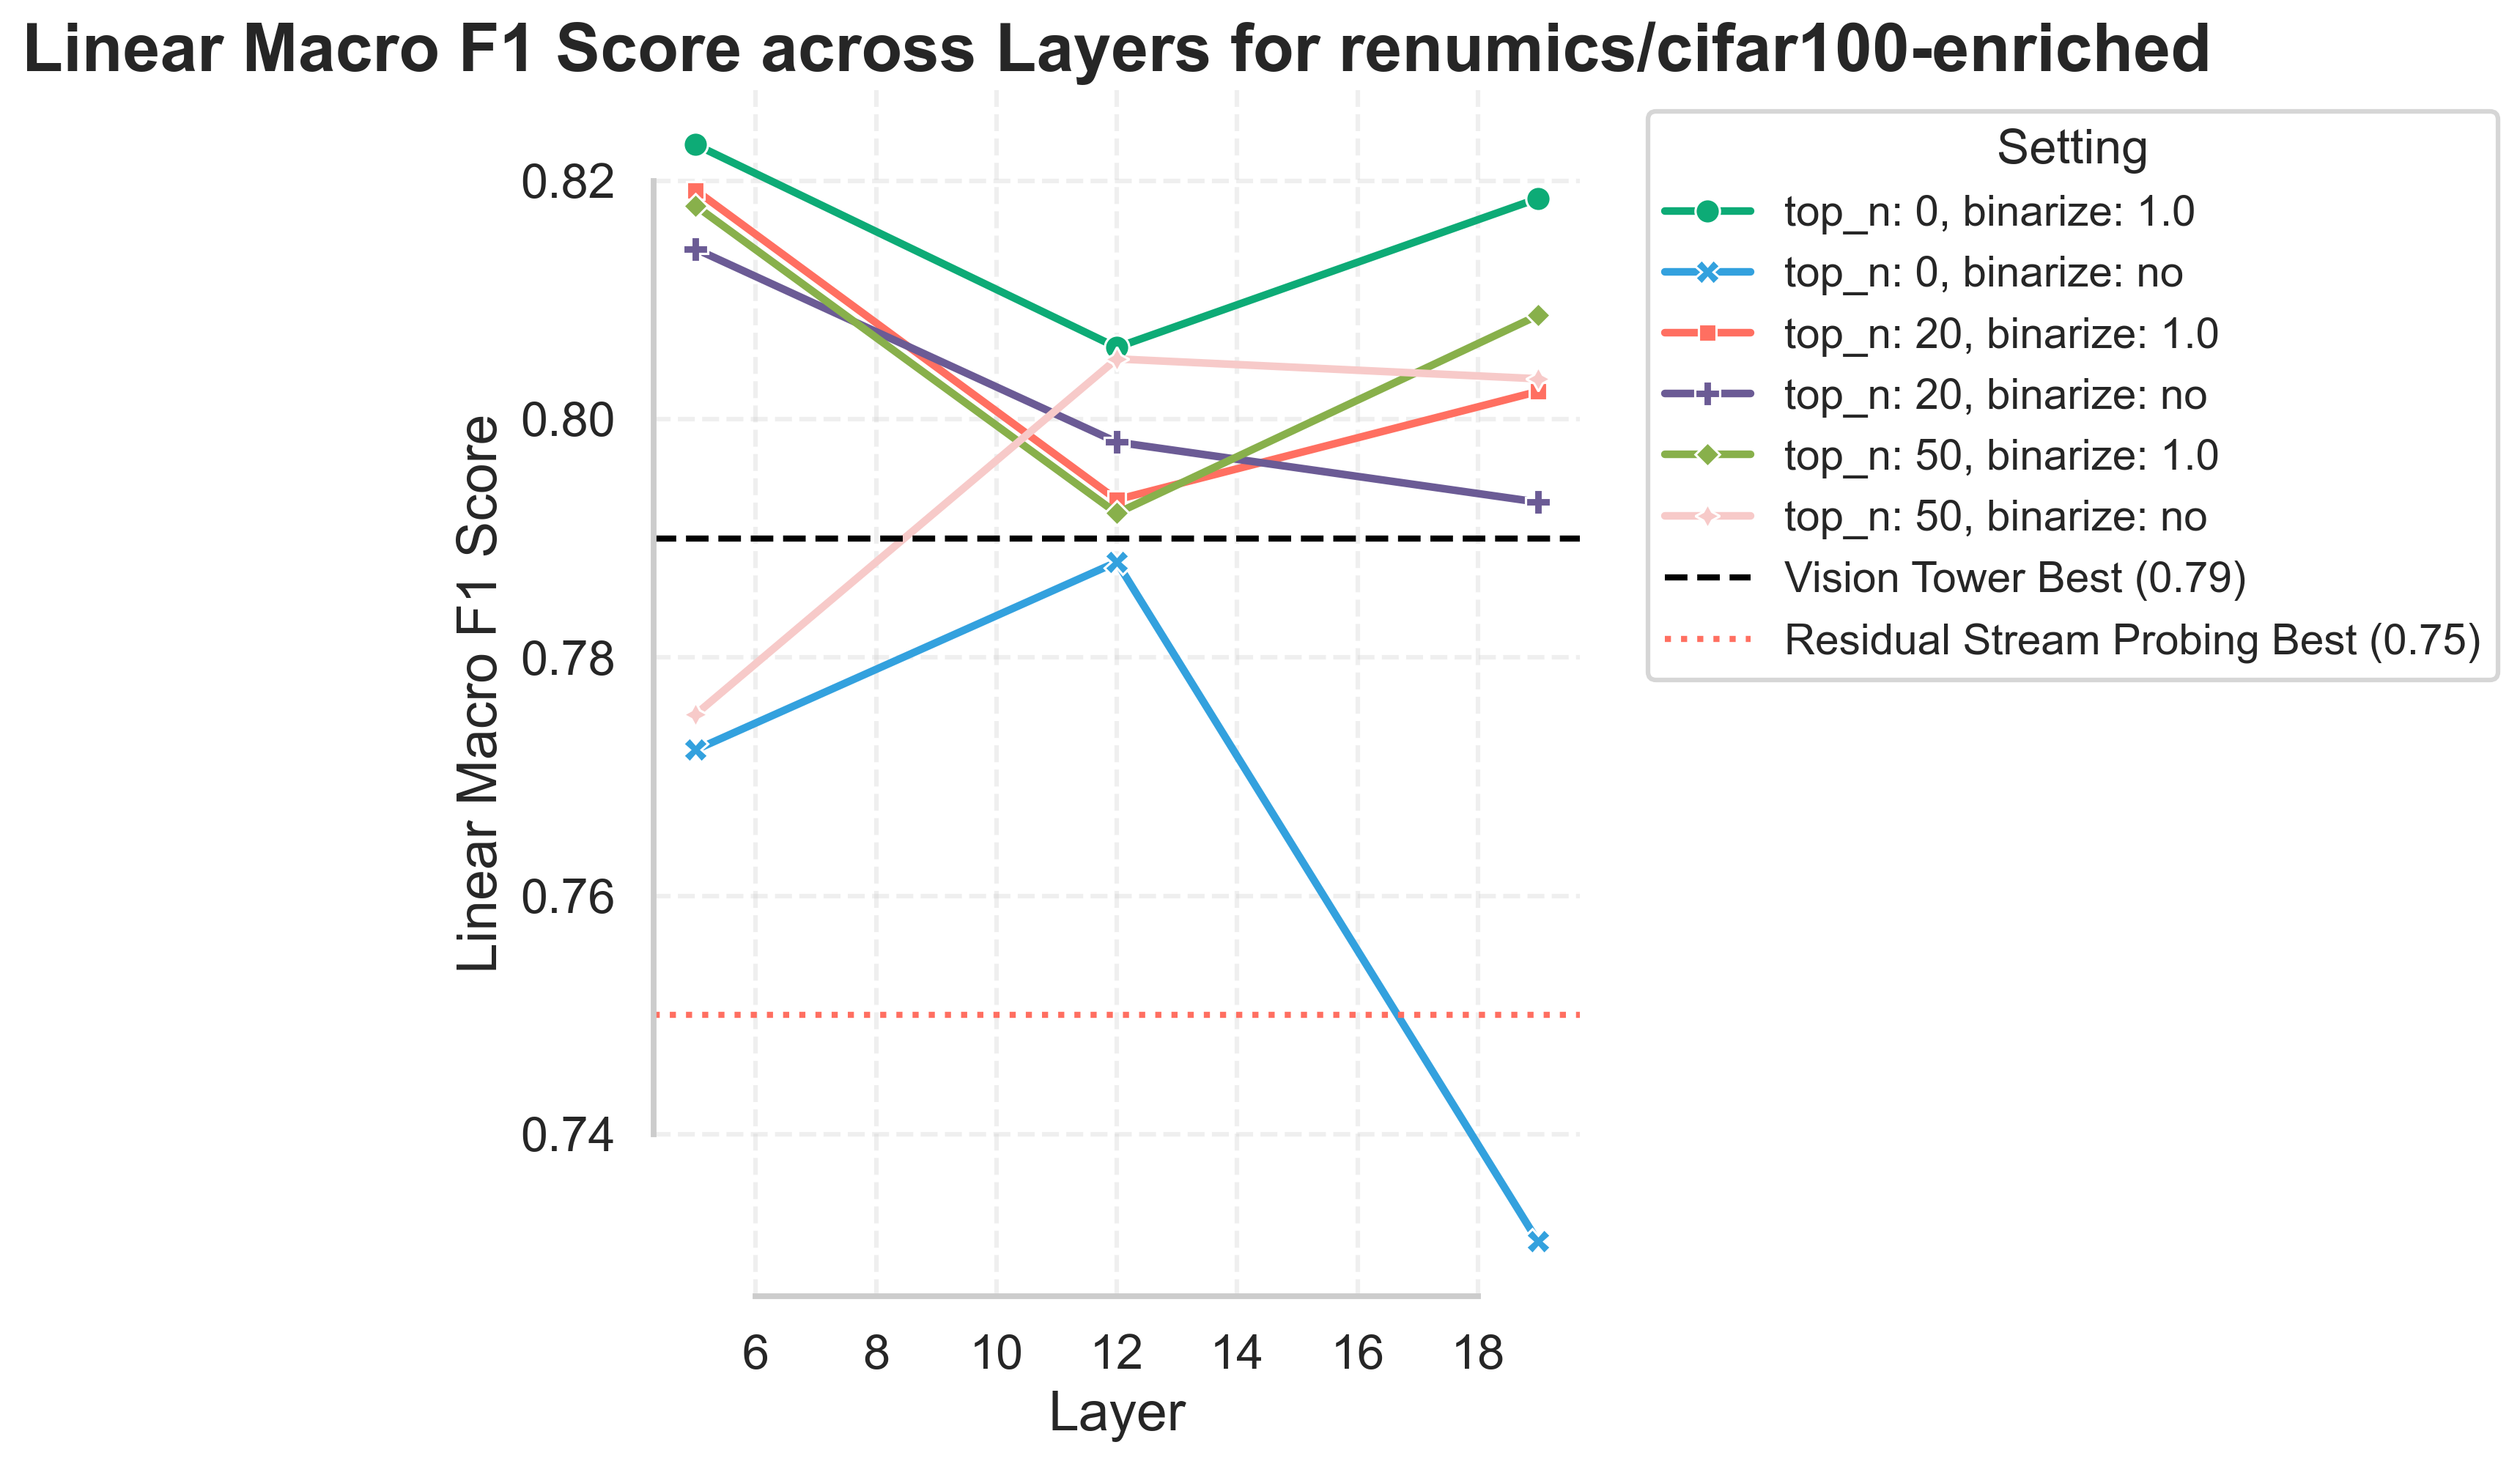

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Custom OpenAI-inspired color palette
openai_palette = ["#0DAB76", "#33A1DE", "#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"]

# Set theme: whitegrid for a clean background, 'talk' context for emphasis, and our custom palette
sns.set_theme(style="whitegrid", context="talk", palette=openai_palette)

# Filter for SAE Features only
sae_df = df[df['type'] == 'SAE Features']

# Group by dataset, layer, top_n, binarize and compute mean score
grouped = sae_df.groupby(['dataset_name', 'layer', 'top_n', 'binarize'])['linear_macro_f1_score'].mean().reset_index()

# Create a combined setting description
grouped['setting'] = grouped.apply(lambda r: f"top_n: {r.top_n}, binarize: {r.binarize}", axis=1)

# Baseline values for each dataset
vision_baselines = {
    'nelorth/oxford-flowers': 0.98,
    'rajistics/indian_food_images': 0.98,
    'renumics/cifar100-enriched': 0.79
}
residual_baselines = {
    'nelorth/oxford-flowers': 0.95,
    'rajistics/indian_food_images': 0.90,
    'renumics/cifar100-enriched': 0.75
}

datasets = grouped['dataset_name'].unique()

for dataset in datasets:
    dataset_data = grouped[grouped['dataset_name'] == dataset]
    
    # High resolution figure suitable for conference (300 dpi)
    plt.figure(figsize=(10, 7), dpi=300)
    
    # Plot lines for each combination of top_n and binarization
    ax = sns.lineplot(
        data=dataset_data,
        x='layer',
        y='linear_macro_f1_score',
        hue='setting',
        style='setting',
        markers=True,
        dashes=False,
        linewidth=2.5,
        markersize=8
    )
    
    # Add baseline lines
    vb = vision_baselines.get(dataset)
    rb = residual_baselines.get(dataset)

    if vb is not None:
        plt.axhline(y=vb, color='black', linestyle='--', linewidth=2, label=f'Vision Tower Best ({vb:.2f})')

    if rb is not None:
        plt.axhline(y=rb, color='#FF6F61', linestyle=':', linewidth=2, label=f'Residual Stream Probing Best ({rb:.2f})')
    
    # Titles and labels with larger fonts for conference clarity
    plt.title(f'Linear Macro F1 Score across Layers for {dataset}', fontsize=22, weight='bold')
    plt.xlabel('Layer', fontsize=18)
    plt.ylabel('Linear Macro F1 Score', fontsize=18)
    
    # Customize tick parameters for readability
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Manage legend outside plot area for clarity
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Setting', 
               bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
    
    sns.despine(trim=True)  # Remove top and right spines for a cleaner look
    plt.tight_layout()
    plt.show()